## Business Understanding: 

The loan providing companies find it hard to give loans to people due to their inadequate or missing credit history. Some consumers use this to their advantage by becoming a defaulter.

When the company receives a loan application, the company has the rights for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s or company’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan tends in a business loss to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default/fraud, then approving the loan may lead to a financial loss for the company.

The data contains information about the loan applications.

When a client applies for a loan, there are four types of decisions that could be taken by the bank/company:

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

The datasets used are explained below:

1. 'application_data.csv' - contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' - contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

### Problem Statement:

We have to understand how the bank approves and refuses any loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.



### Approach for EDA : 
    
1. Importing Module
2. Reading the Dataset into Pandas Dataframe
3. We have divided the columns into small segments and anlyzed segment-wise using a smaller dataframe containing only relevant categories.
4. Data Cleaning.
5. Univariate, Bivariate and Multivariate Analysis


## Importing the Modules

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For suppresing warnings
import warnings
warnings.filterwarnings("ignore")

### Data Analysis of application_data.csv

#### Reading the Application Data 

In [18]:
application_df = pd.read_csv("Documents/datasets/application_data.csv")

### Sanity checks of the data

In [19]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
application_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [21]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
application_df.shape

(307511, 122)

### Data Cleaning

In [24]:
#Let's find out the percentage of data which is missing 
round(application_df.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [25]:
# Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
application_df = application_df.loc[:,application_df.isnull().mean()<=0.5]
application_df.shape

(307511, 81)

In [26]:
### Selecting columns which have numeric values for further analysis

In [27]:
numeric_columns_df = application_df.select_dtypes(include='float64')
print(numeric_columns_df.shape)
numeric_columns_df.info()


(307511, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   CNT_FAM_MEMBERS               307509 non-null  float64
 7   EXT_SOURCE_2                  306851 non-null  float64
 8   EXT_SOURCE_3                  246546 non-null  float64
 9   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 10  FLOORSMAX_AVG                 154491 non-null  float64
 11  YEARS_BEGINEXPLUATATION_MODE  157504 non-null  float64
 12  FLOORSMAX_MODE                1

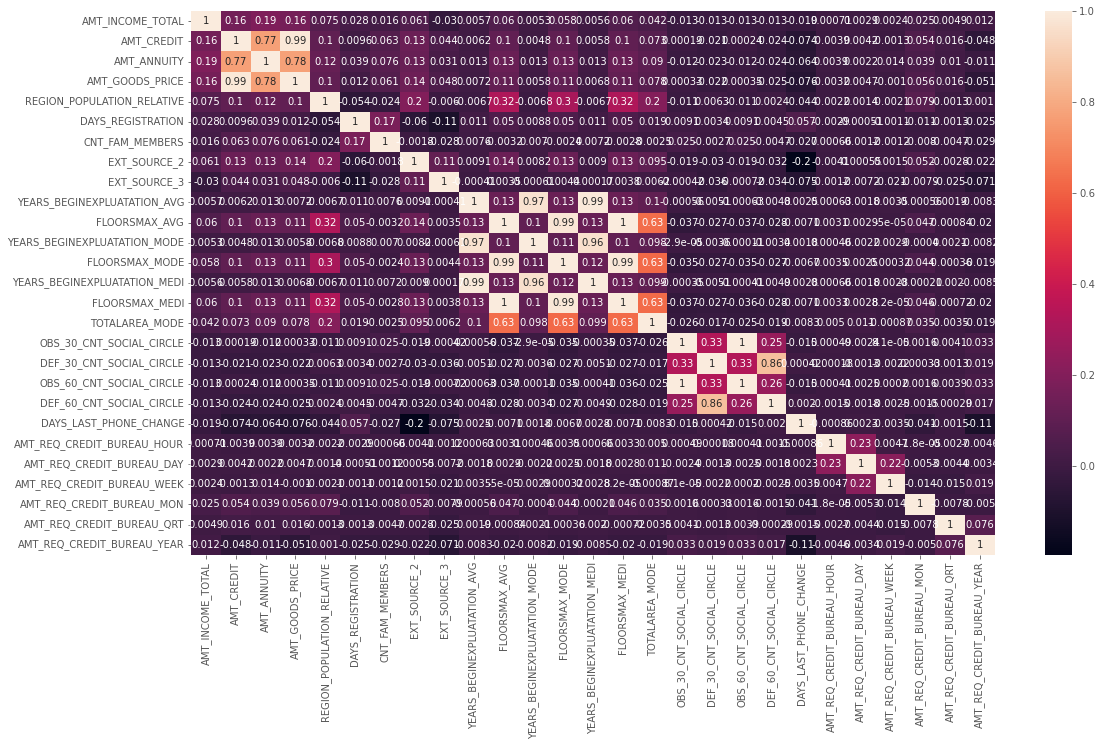

In [28]:
# Checking correlation between numeric columns of application.csv data
plt.figure(figsize=(18,10))
sns.heatmap(numeric_columns_df.corr(), annot=True)
plt.show()

In [29]:
#Selecting columns with less or equal to 10% null vallues
list(application_df.columns[(application_df.isnull().mean()<=0.10) & (application_df.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

###  Checking for values to impute in columns

In [30]:
##AMT_ANNUITY Imputation

In [31]:
application_df['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

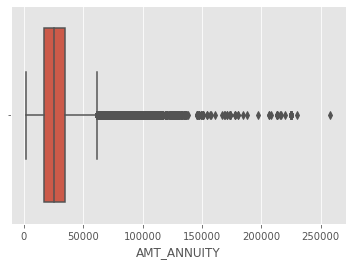

In [32]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [33]:
imput_annuity = round(application_df['AMT_ANNUITY'].median(),4)
print(f'Since AMT_ANNUITY contains outliers, the column can be imputed using the median of the coumn i.e. {imput_annuity}')

Since AMT_ANNUITY contains outliers, the column can be imputed using the median of the coumn i.e. 24903.0


In [34]:
### AMT_GOODS_PRICE imputation

In [35]:
 application_df['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

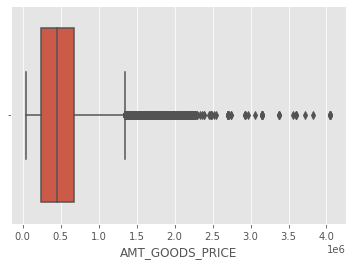

In [36]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [37]:
# Since this is a continuous variable with outliers we can impute column using median value
imput_goods_price = round(application_df['AMT_GOODS_PRICE'].median(),4)
print(f'Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. {imput_goods_price}')

Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. 450000.0


In [38]:
### NAME_TYPE_SUITE imputation

In [39]:
application_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [40]:
imput_Name_type_suite = application_df['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imput_Name_type_suite[0]}') 

Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


In [41]:
### CNT_FAM_MEMBERS imputation

In [42]:
application_df['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

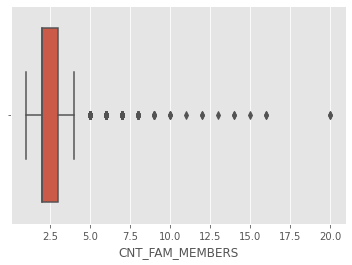

In [43]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(application_df['CNT_FAM_MEMBERS'])
plt.show()

In [44]:
imput_fam_members_count = round(application_df['CNT_FAM_MEMBERS'].median(),4)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. {imput_fam_members_count}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0


In [45]:
### Checking for imbalance in Target

In [46]:
application_df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

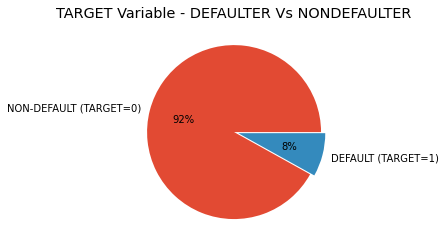

In [47]:
plt.pie(application_df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

In [48]:
# Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

In [49]:
### Binning variables for analysis

In [50]:
application_df['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
#Creating A new categorical variable based on income total
application_df['INCOME_GROUPS']=pd.qcut(application_df['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [52]:
application_df['INCOME_GROUPS'].describe()

count     307511
unique         5
top       Medium
freq       84302
Name: INCOME_GROUPS, dtype: object

In [53]:
#Binning DAYS_BIRTH
abs(application_df['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [54]:
#Creating a column AGE using DAYS_BIRTH
application_df['AGE']=abs(application_df['DAYS_BIRTH'])//365

In [55]:
application_df['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [56]:
## Since the AGE varies from 20 to 69, we can create bins of 10 years starting from 20 to 70
application_df['AGE_GROUPS'] = pd.cut(application_df['AGE'],bins=np.arange(20,71,10))

In [57]:
application_df['AGE_GROUPS'].describe()

count       307510
unique           5
top       (30, 40]
freq         83117
Name: AGE_GROUPS, dtype: object

In [58]:
## Adding one more column that will be used for analysis later
application_df['CREDIT_INCOME_RATIO']=round((application_df['AMT_CREDIT']/application_df['AMT_INCOME_TOTAL']))

In [59]:
application_df['CREDIT_INCOME_RATIO'].describe()

count    307511.000000
mean          3.957426
std           2.706147
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          85.000000
Name: CREDIT_INCOME_RATIO, dtype: float64

In [60]:
### Getting the percentage of social circle who defaulted
application_df['SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE']=application_df['DEF_30_CNT_SOCIAL_CIRCLE']/application_df['OBS_30_CNT_SOCIAL_CIRCLE']
application_df['SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE']=application_df['DEF_60_CNT_SOCIAL_CIRCLE']/application_df['OBS_60_CNT_SOCIAL_CIRCLE']

In [61]:
application_df['SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE'].describe()

count    142580.000000
mean          0.143940
std           0.299485
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE, dtype: float64

In [62]:
application_df['SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE'].describe()

count    141824.000000
mean          0.109023
std           0.270458
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE, dtype: float64

In [63]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement for further analysis
Required_Columns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUPS','AGE_GROUPS','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE',
'SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [64]:
application_df_required=application_df[Required_Columns]

In [65]:
application_df_required.shape

(307511, 30)

In [66]:
application_df_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   SK_ID_CURR                                  307511 non-null  int64   
 1   TARGET                                      307511 non-null  int64   
 2   CODE_GENDER                                 307511 non-null  object  
 3   FLAG_OWN_CAR                                307511 non-null  object  
 4   FLAG_OWN_REALTY                             307511 non-null  object  
 5   INCOME_GROUPS                               307511 non-null  category
 6   AGE_GROUPS                                  307510 non-null  category
 7   AMT_CREDIT                                  307511 non-null  float64 
 8   AMT_INCOME_TOTAL                            307511 non-null  float64 
 9   CREDIT_INCOME_RATIO                         307511 non-null

In [67]:
### Splitting the dataframe into two separate dfs 

In [68]:
Non_Defaulters_df=application_df_required[application_df_required.TARGET==0]    # Dataframe with all the data related to non-defaulters
Defaulters_df=application_df_required[application_df_required.TARGET==1]    # Dataframe with all the data related to defaulters

In [69]:
Non_Defaulters_df.describe()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE,SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
count,282686.000000,282686.0,2.826860e+05,2.826860e+05,282686.000000,282686.000000,282686.000000,282686.000000,282684.000000,282686.000000,130741.000000,130056.000000,245459.000000,245459.000000,245459.000000,282674.000000,282686.000000,2.824290e+05
mean,278244.744536,0.0,6.026483e+05,1.690777e+05,3.963893,65696.146123,-5029.941065,0.056840,2.150154,2.022449,0.140138,0.105877,0.006914,0.270697,0.265939,27163.623349,2.043578,5.427368e+05
std,102825.776954,0.0,4.068459e+05,1.104763e+05,2.711177,142877.810161,3538.464478,0.231538,0.906984,0.501971,0.296166,0.267089,0.111091,0.928799,0.805355,14658.307178,0.508422,3.737855e+05
min,100003.000000,0.0,4.500000e+04,2.565000e+04,0.000000,-17912.000000,-24672.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.500000,1.000000,4.050000e+04
25%,189103.250000,0.0,2.700000e+05,1.125000e+05,2.000000,-2813.000000,-7550.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16456.500000,2.000000,2.385000e+05
50%,278362.500000,0.0,5.177880e+05,1.485000e+05,3.000000,-1235.000000,-4544.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24876.000000,2.000000,4.500000e+05
75%,367241.500000,0.0,8.100000e+05,2.025000e+05,5.000000,-278.000000,-2045.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34749.000000,2.000000,6.885000e+05
max,456255.000000,0.0,4.050000e+06,1.800009e+07,49.000000,365243.000000,0.000000,1.000000,20.000000,3.000000,1.000000,1.000000,9.000000,27.000000,261.000000,258025.500000,3.000000,4.050000e+06


In [70]:
Defaulters_df.describe()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE,SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
count,24825.000000,24825.0,2.482500e+04,2.482500e+04,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,11839.000000,11768.000000,20533.000000,20533.000000,20533.000000,24825.000000,24825.000000,2.480400e+04
mean,277449.167936,1.0,5.577785e+05,1.656118e+05,3.883787,42394.675448,-4487.127009,0.055347,2.181269,2.134824,0.185920,0.143786,0.008036,0.227926,0.259923,26481.744290,2.153635,4.889724e+05
std,102383.123458,0.0,3.464332e+05,7.466770e+05,2.647134,119484.634253,3299.650241,0.228662,0.951327,0.499909,0.331068,0.303075,0.106682,0.745116,0.643789,12450.676999,0.505052,3.116365e+05
min,100002.000000,1.0,4.500000e+04,2.565000e+04,0.000000,-16069.000000,-22928.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2722.500000,1.000000,4.500000e+04
25%,189555.000000,1.0,2.844000e+05,1.125000e+05,2.000000,-2156.000000,-6646.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17361.000000,2.000000,2.385000e+05
50%,276291.000000,1.0,4.975200e+05,1.350000e+05,3.000000,-1034.000000,-4056.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25263.000000,2.000000,4.500000e+05
75%,366050.000000,1.0,7.333155e+05,2.025000e+05,5.000000,-379.000000,-1671.000000,0.000000,3.000000,2.000000,0.250000,0.000000,0.000000,0.000000,0.000000,32976.000000,2.000000,6.750000e+05
max,456254.000000,1.0,4.027680e+06,1.170000e+08,85.000000,365243.000000,0.000000,1.000000,13.000000,3.000000,1.000000,1.000000,4.000000,17.000000,19.000000,149211.000000,3.000000,3.600000e+06


### Univariate Analysis

In [72]:
# function to count plot for categorical variables
def uniplot_1(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=Non_Defaulters_df,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulters and non-defaulters
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(Non_Defaulters_df))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=Defaulters_df,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(Defaulters_df))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

In [85]:
#### Univariate Categorical Ordered Analysis 

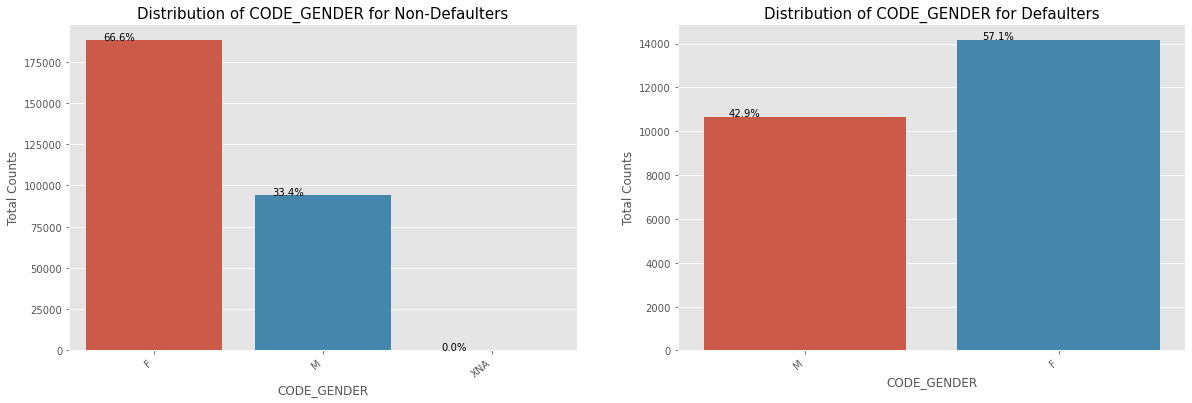

In [73]:
uniplot_1('CODE_GENDER')

We can see that Females contribute 67% to the non-defaulters while 57% to the defaulters. We can conclude that we see more female applying for loans than males and hence the more number of female defaulters as well.
But the rate of default of FEMALE is much lower compared to their MALE counterparts. Additionally we can drop the data of XNA as it's very minimal and won't affect our analysis.

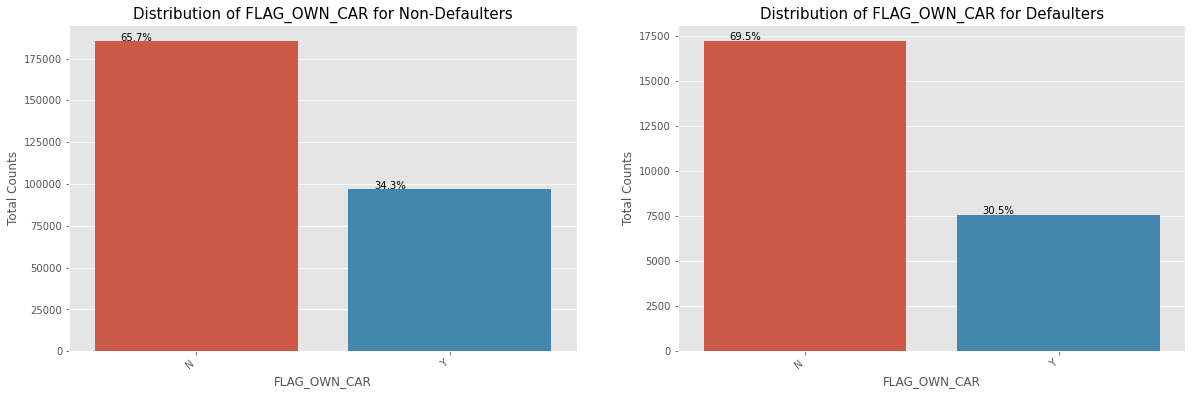

In [74]:
uniplot_1('FLAG_OWN_CAR')

We can see that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that while people who have car default more often, the reason could be there are simply more people without cars.
Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

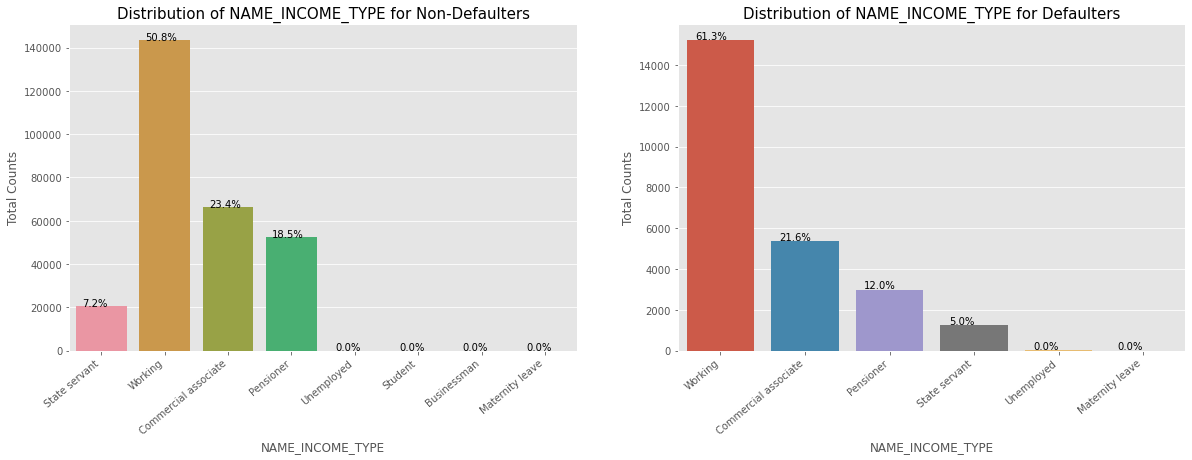

In [75]:
uniplot_1('NAME_INCOME_TYPE')

We can notice that the students don't default. The reason could be they are not required to pay during the time they are students.
We can also see that the BusinessMan never default.
Most of the loans are distributed to working class people.
We also see that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case.

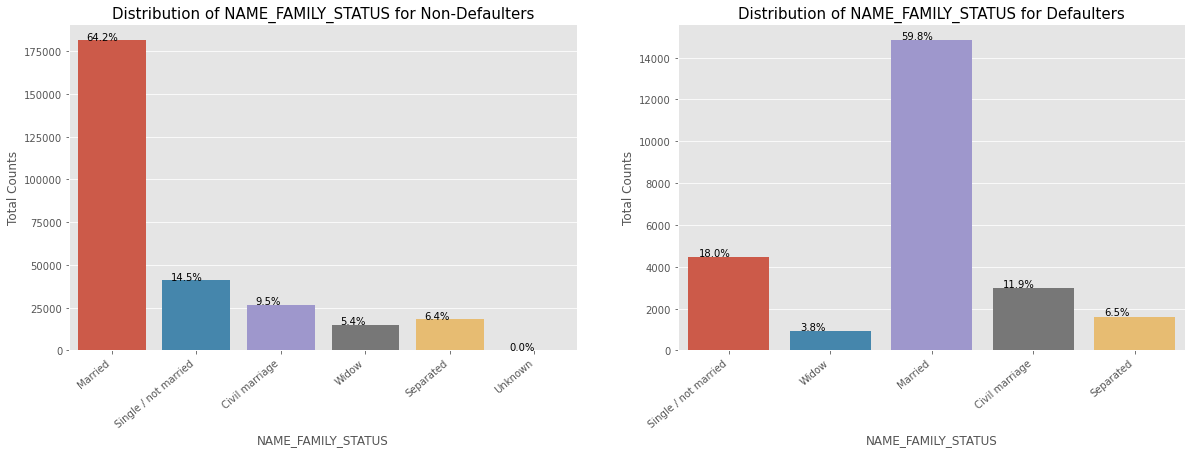

In [76]:
uniplot_1('NAME_FAMILY_STATUS')

Married people tend to apply for more loans comparatively.
But from the graph we see that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.

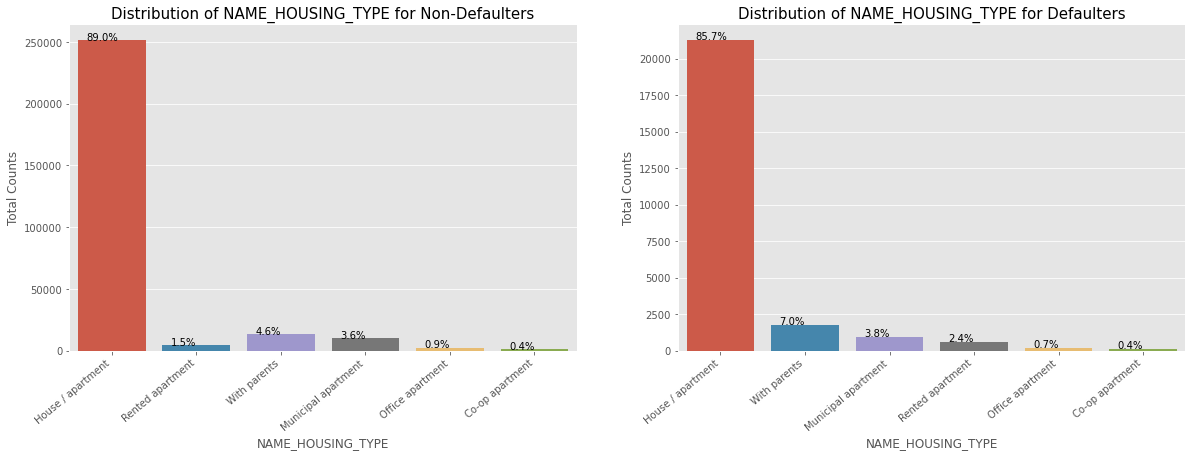

In [77]:
uniplot_1('NAME_HOUSING_TYPE')

It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
People living with parents tend to default more often when compared with others. The reason could be their living expenses are more due to their parents living with them.

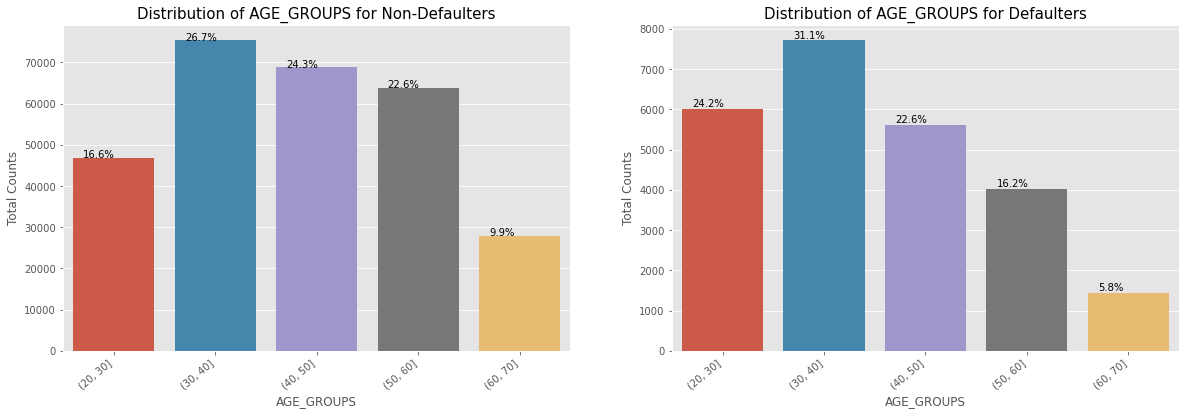

In [78]:
uniplot_1('AGE_GROUPS')

We see that (30,40) age group tend to default more often. So they are the riskiest people to loan to.
With increasing age group, people tend to default less starting from the age 40. One of the reasons could be they get employed and settled around that age and with increasing age, their salary also increases.

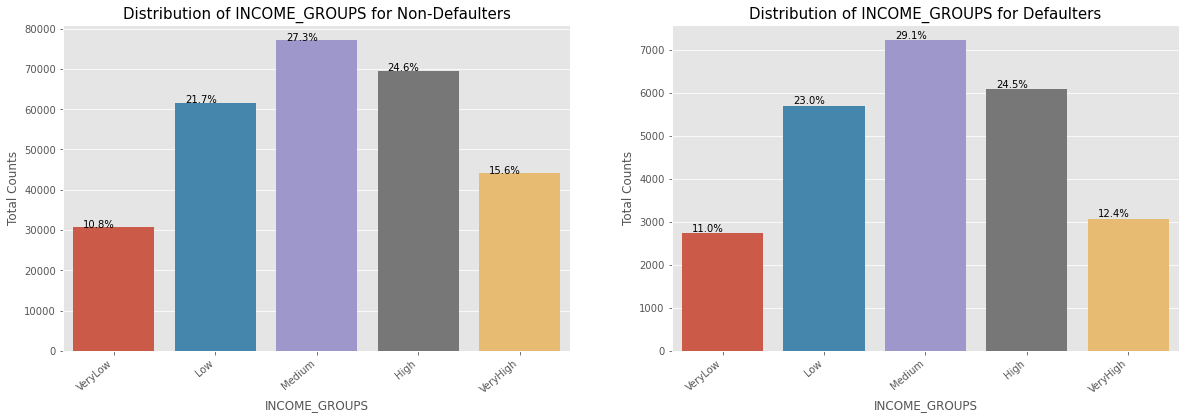

In [79]:
uniplot_1('INCOME_GROUPS')

The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.

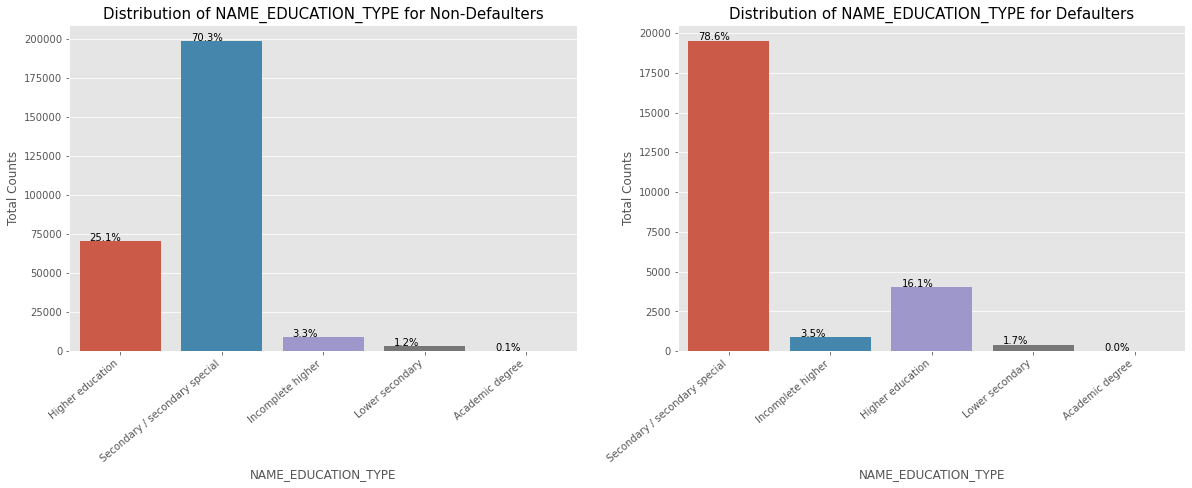

In [80]:
uniplot_1('NAME_EDUCATION_TYPE')

Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default.

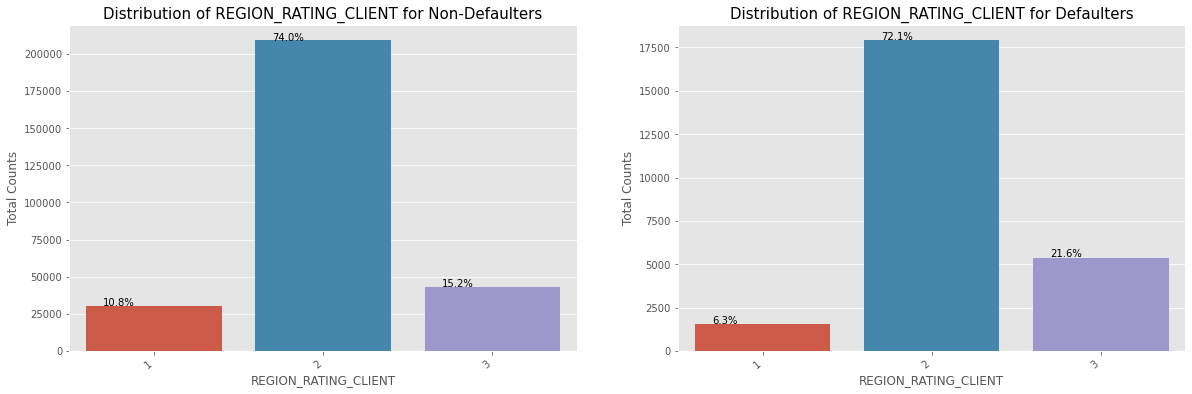

In [81]:
uniplot_1('REGION_RATING_CLIENT')

More people from second tier regions tend to apply for loans.
We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage than people living in 1 rated areas.

In [82]:
#### Univariate continuous variable analysis

In [83]:
# function to draw plot for continuous variables
def uniplot_2(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=Non_Defaulters_df[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=Defaulters_df[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

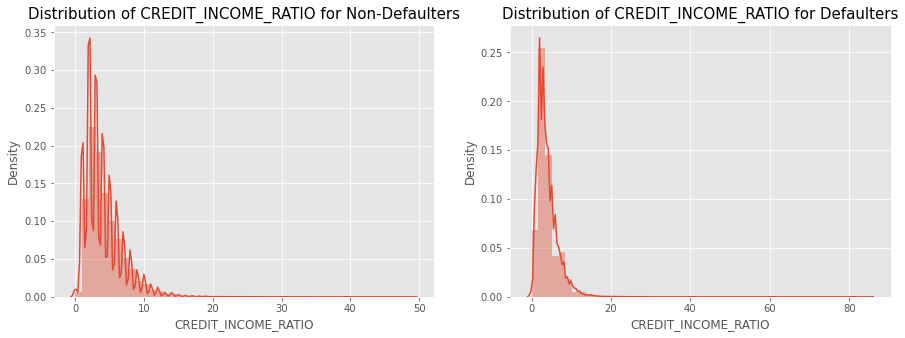

In [84]:
uniplot_2('CREDIT_INCOME_RATIO')

Credit income ratio is the ratio of AMT_CREDIT/AMT_INCOME_TOTAL.
Although there doesn't seem to be a clear distinction between the group which defaulted vs the group which didn't when compared using the ratio, we can see that when the CREDIT_INCOME_RATIO is more than 50, people default.

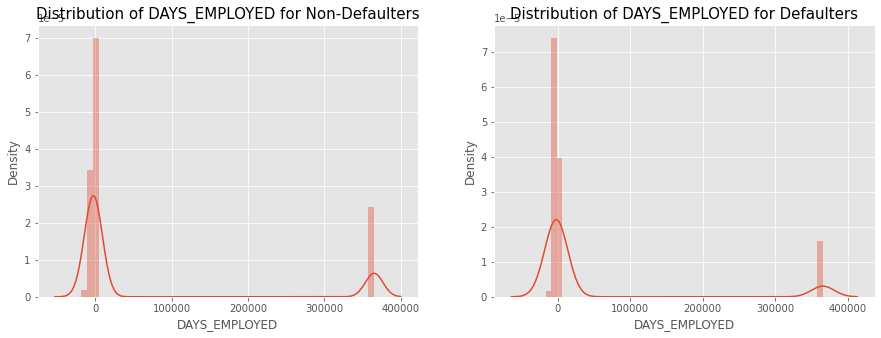

In [85]:
uniplot_2('DAYS_EMPLOYED')

There isn't much distinction between defaulters and non-defaulters on the basis of days employed.

In [86]:
###  Getting the top 10 correlation of the selected columns

In [87]:
#Getting the top 10 correlation in Non_Defaulters_df
corr=Non_Defaulters_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149,0.950149
208,SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE,SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE,0.873003,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
272,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648590,0.648590
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628747,0.628747
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391502,0.391502
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462


In [88]:
#Getting the top 10 correlation Defaulters_df
corr=Defaulters_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
208,SOCIAL_CIRCLE_60_DAYS_DEFAULTER_PERCENTAGE,SOCIAL_CIRCLE_30_DAYS_DEFAULTER_PERCENTAGE,0.874562,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
272,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163,0.623163
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
113,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561


### Bivariate Analysis of numerical variables

In [89]:
# function for scatter plot for continuous variables
def biplot_1(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=Non_Defaulters_df,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=Defaulters_df,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

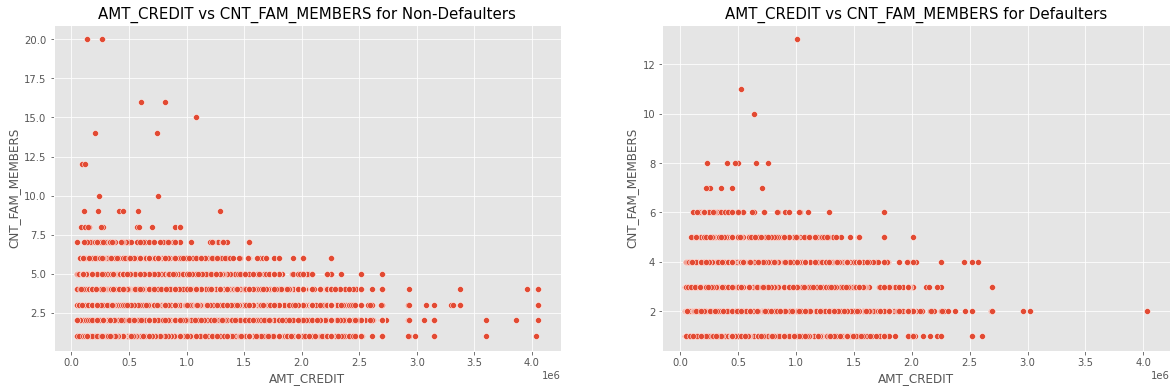

In [90]:
biplot_1('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.

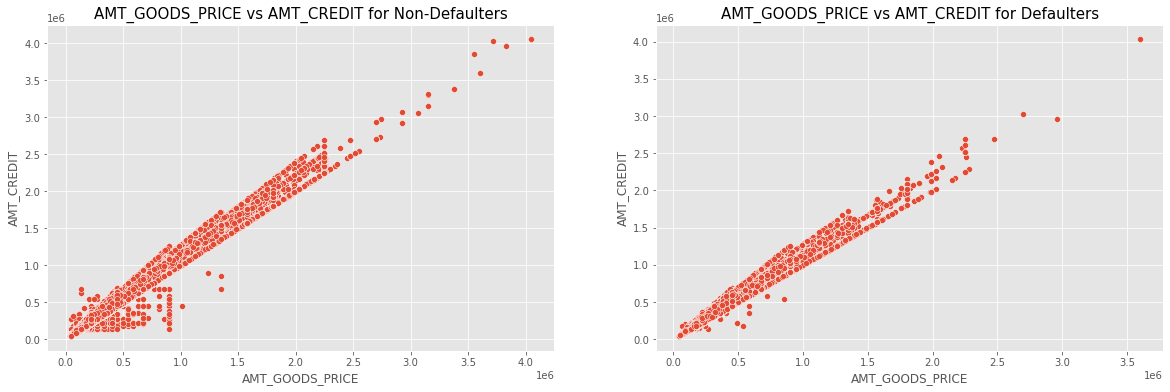

In [91]:
biplot_1('AMT_GOODS_PRICE','AMT_CREDIT')

AMT_CREDIT and AMT_GOODS_PRICE have linear relation.
For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters

<Figure size 1440x576 with 0 Axes>

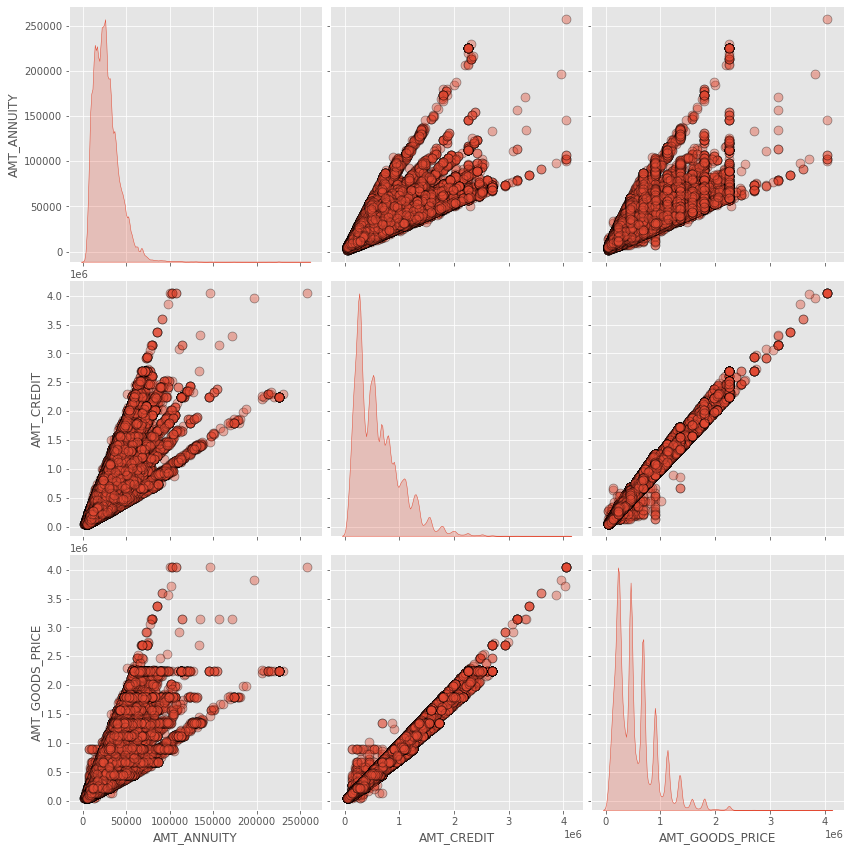

In [92]:
#plotting the relation between correlated,highly corelated and numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(Non_Defaulters_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

<Figure size 1440x576 with 0 Axes>

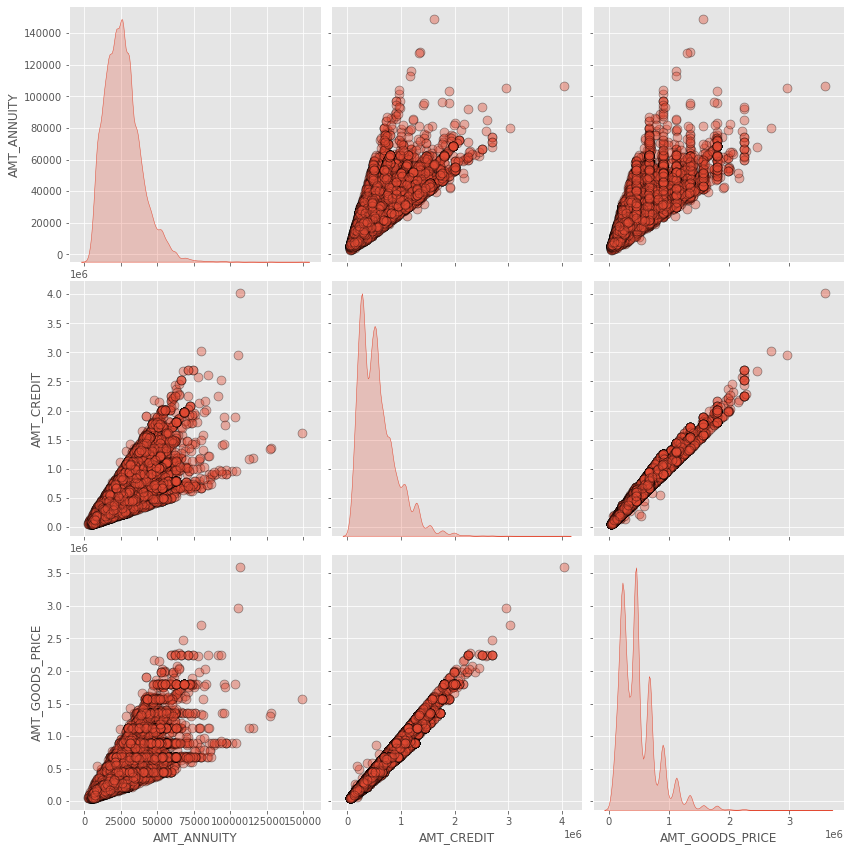

In [145]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(Defaulters_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

## Summary:

1. This data is highly imbalanced as number of defaulter is very less in total population.
2. 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, 'EXT_SOURCE_1' and 'EXT_SOURCE_3' are some of the important driving factors.
3. Most of the applicants live in House/Apartment 
4. Applicants living with their parents or in rented apartment have higher rate of default.
5. Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.
6. People are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.
7. AMT_CREDIT and AMT_GOODS_PRICE have linear relation. For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters.
8. More people from second tier regions tend to apply for loans. We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage than people living in 1 rated areas.
9. Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default.
10. The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.
11. The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.
12. We see that (30,40) age group tend to default more often. So they are the riskiest people to loan to. With increasing age group, people tend to default less starting from the age 40. One of the reasons could be they get employed and settled around that age and with increasing age, their salary also increases.
13. People living with parents tend to default more often when compared with others. The reason could be their living expenses are more due to their parents living with them.
14. Married people tend to apply for more loans comparatively. But from the graph we see that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.
15. We can notice that the students don't default. The reason could be they are not required to pay during the time they are students. We can also see that the BusinessMan never default. Most of the loans are distributed to working class people. We also see that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case.
16. We can see that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that while people who have car default more often, the reason could be there are simply more people without cars. Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.
17. We can see that Females contribute 67% to the non-defaulters while 57% to the defaulters. We can conclude that we see more female applying for loans than males and hence the more number of female defaulters as well. But the rate of default of FEMALE is much lower compared to their MALE counterparts. Additionally we can drop the data of XNA as it's very minimal and won't affect our analysis.


## Data Analysis For previous_application.csv

#### Reading the Application Data 

In [93]:
pre_app_df = pd.read_csv("Documents/datasets/previous_application.csv")

###  Sanity checks of the data

In [94]:
pre_app_df.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
pre_app_df.tail(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670204,1407146,198989,Cash loans,36598.095,450000.0,570073.5,NaN,450000.0,THURSDAY,12,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670205,2815130,338803,Cash loans,14584.050,135000.0,182956.5,NaN,135000.0,SATURDAY,10,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
1670206,2459206,238591,Cash loans,19401.435,180000.0,243936.0,0.0,180000.0,TUESDAY,13,...,XNA,24.0,high,Cash Street: high,365243.0,-1802.0,-1112.0,-1112.0,-1100.0,0.0
1670207,1662353,443544,Cash loans,12607.875,112500.0,112500.0,0.0,112500.0,MONDAY,10,...,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
1670208,1556789,209732,Cash loans,22299.390,315000.0,436216.5,NaN,315000.0,THURSDAY,17,...,XNA,36.0,middle,Cash X-Sell: middle,365243.0,-1249.0,-199.0,-919.0,-912.0,1.0
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [96]:
pre_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
pre_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [98]:
pre_app_df.shape

(1670214, 37)

### Data Cleaning

In [100]:
#Let's find out the percentage of data which is missing 
round(pre_app_df.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [101]:
# Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
pre_app_df = pre_app_df.loc[:,pre_app_df.isnull().mean()<=0.5]
pre_app_df.shape

(1670214, 33)

In [102]:
#Selecting columns which have numeric values for further analysis

In [103]:
numeric_col_df = pre_app_df.select_dtypes(include='float64')
print(numeric_col_df.shape)
numeric_col_df.info()


(1670214, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297979 non-null  float64
 1   AMT_APPLICATION            1670214 non-null  float64
 2   AMT_CREDIT                 1670213 non-null  float64
 3   AMT_GOODS_PRICE            1284699 non-null  float64
 4   CNT_PAYMENT                1297984 non-null  float64
 5   DAYS_FIRST_DRAWING         997149 non-null   float64
 6   DAYS_FIRST_DUE             997149 non-null   float64
 7   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 8   DAYS_LAST_DUE              997149 non-null   float64
 9   DAYS_TERMINATION           997149 non-null   float64
 10  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(11)
memory usage: 140.2 MB


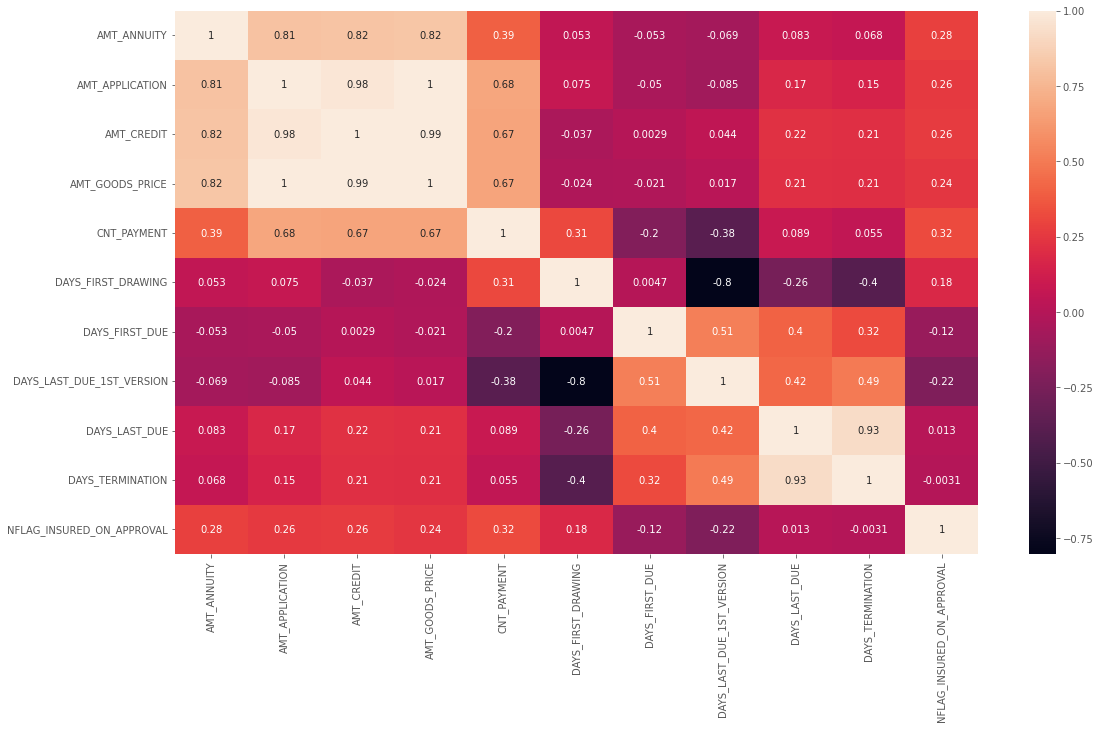

In [104]:
# Checking correlation between numeric columns of previous application.csv data
plt.figure(figsize=(18,10))
sns.heatmap(numeric_col_df.corr(), annot=True)
plt.show()

In [105]:
#Getting the top 10 correlation in Previous Application
corr=pre_app_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### Univariate analysis


In [106]:
# function to count plot for categorical variables
def uniplot_3(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=pre_app_df,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

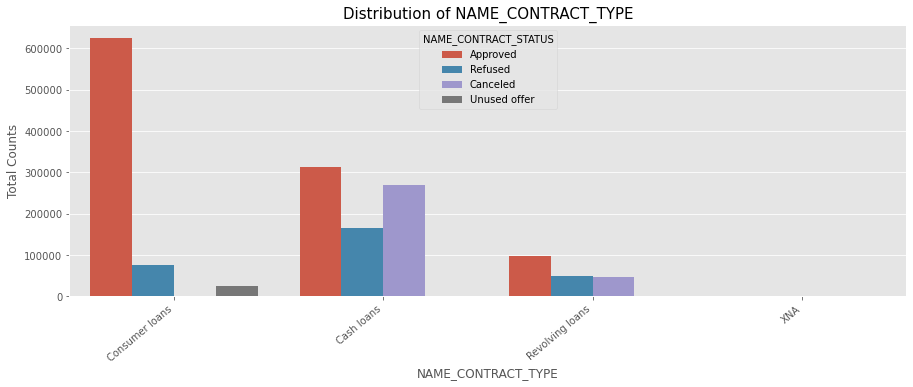

In [107]:
uniplot_3('NAME_CONTRACT_TYPE')

From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

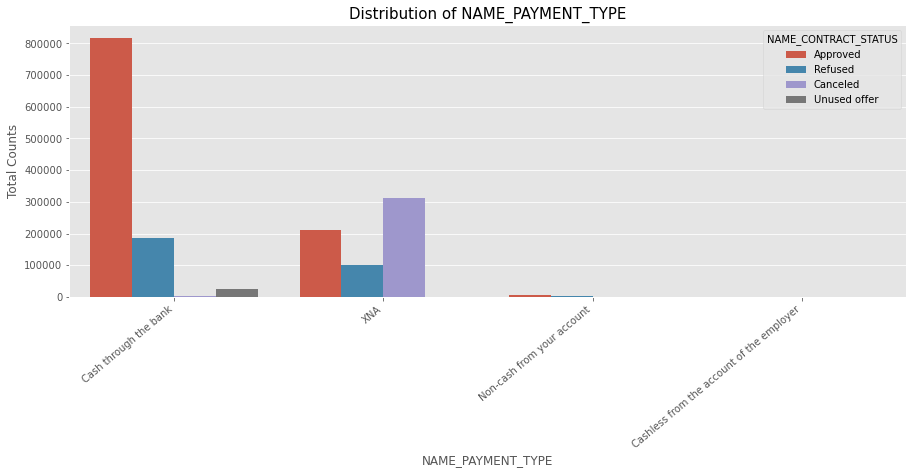

In [108]:
uniplot_3('NAME_PAYMENT_TYPE')

From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option.
We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

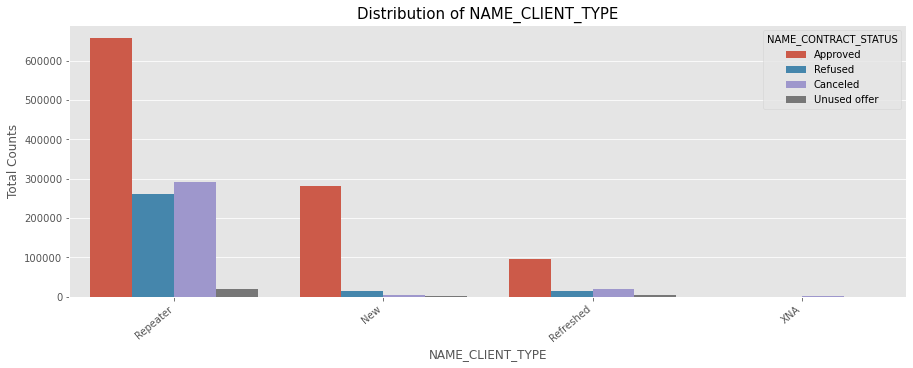

In [109]:
uniplot_3('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

In [110]:
### Using pairplot to perform bivariate analysis on numerical columns 

<Figure size 1440x576 with 0 Axes>

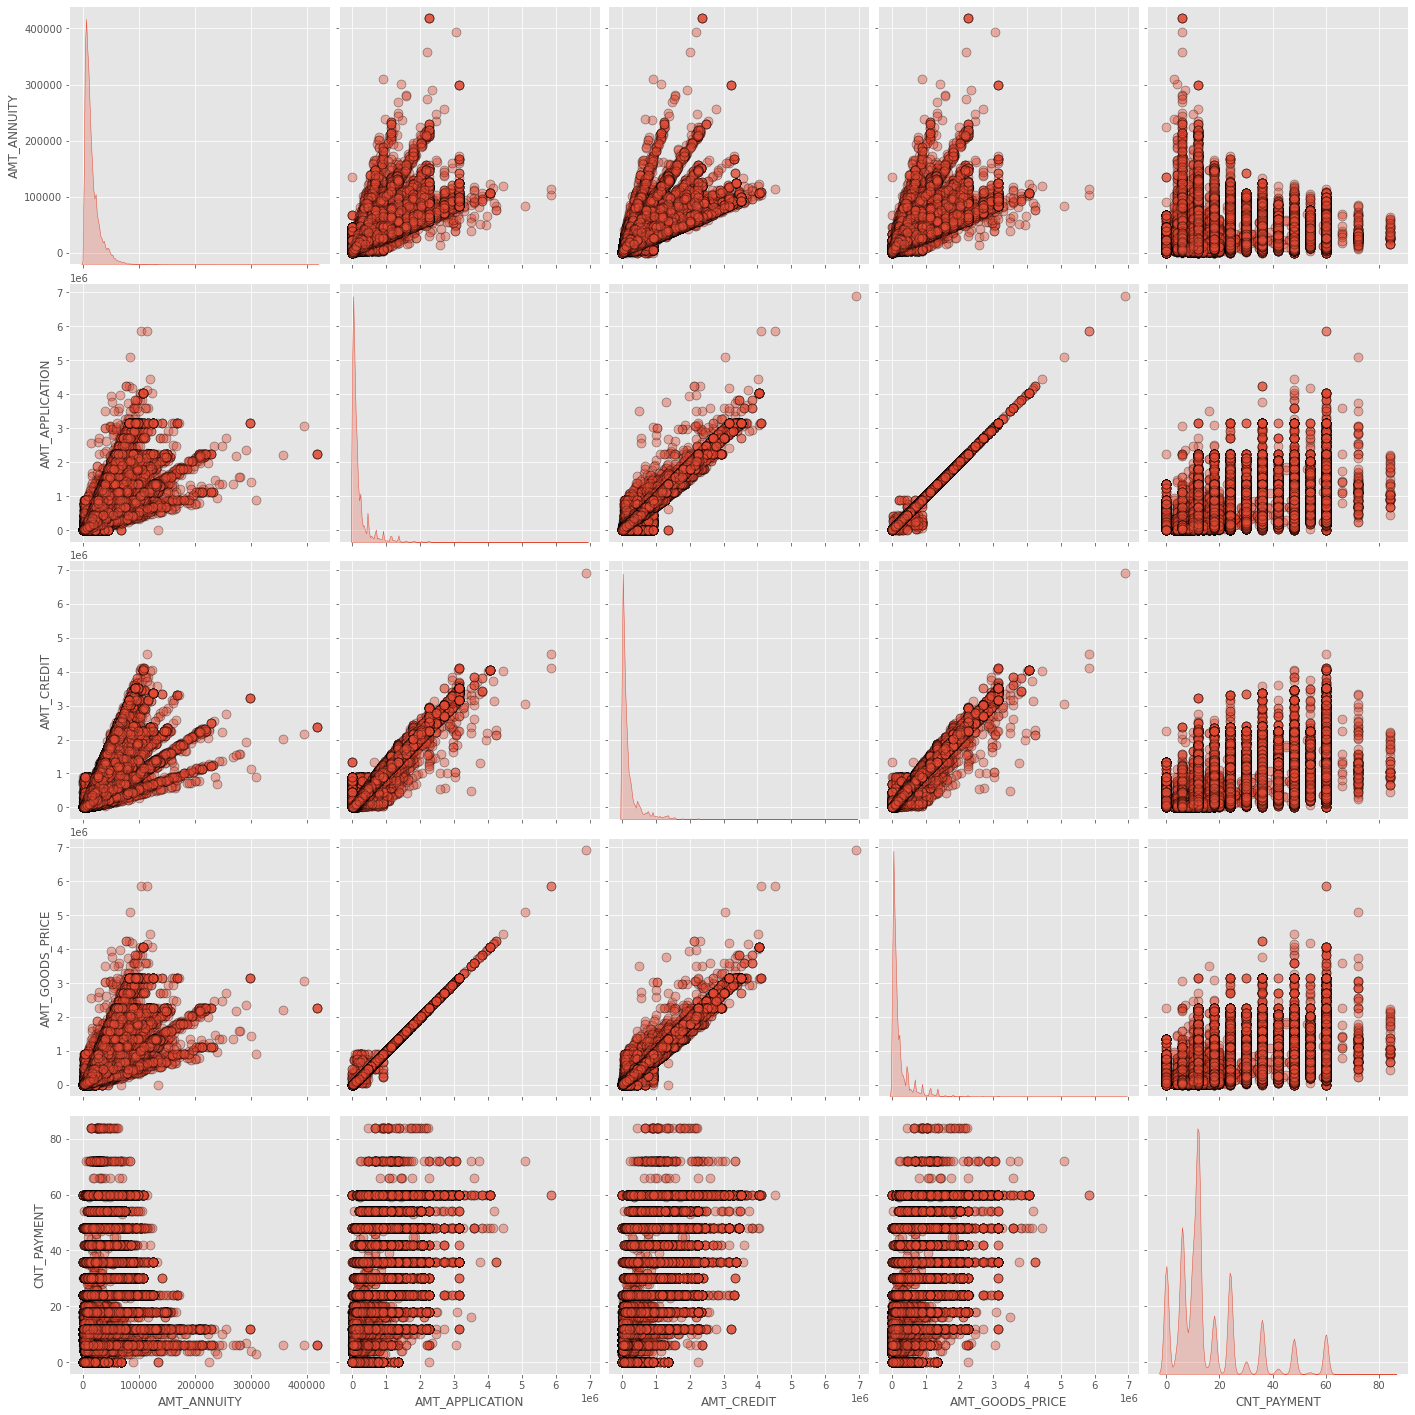

In [111]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(pre_app_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','CNT_PAYMENT']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors):

(i) How much credit did client asked on the previous application
(ii) Final credit amount on the previous application that was approved by the bank
(iii) Goods price of good that client asked for on the previous application.

2.For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application.

3.Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.


In [181]:
### Using box plot to do some more bivariate analysis on categorical vs numeric columns

In [112]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=pre_app_df)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

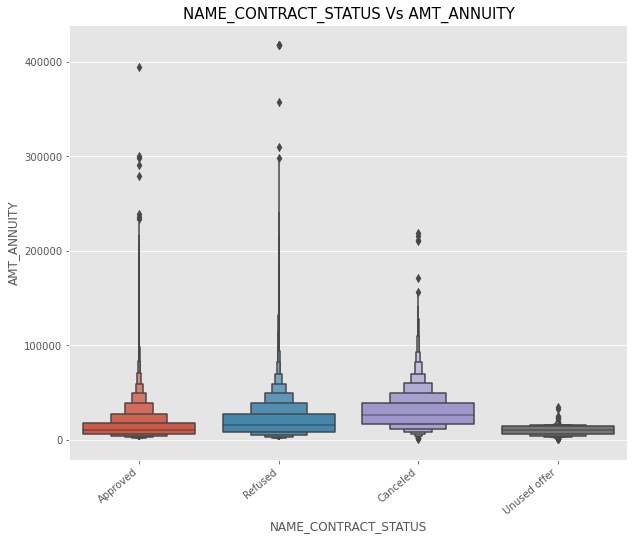

In [113]:
#by-variant analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

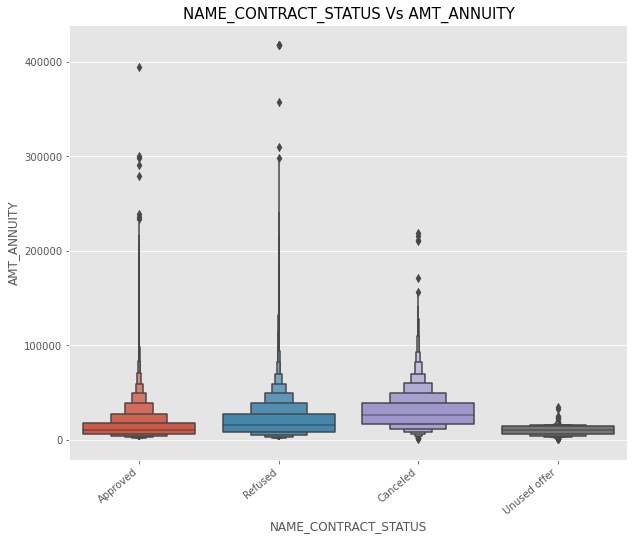

In [114]:
#by-variant analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

 From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.<br> We also see that applications with too high AMT ANNUITY also got refused more often than others.

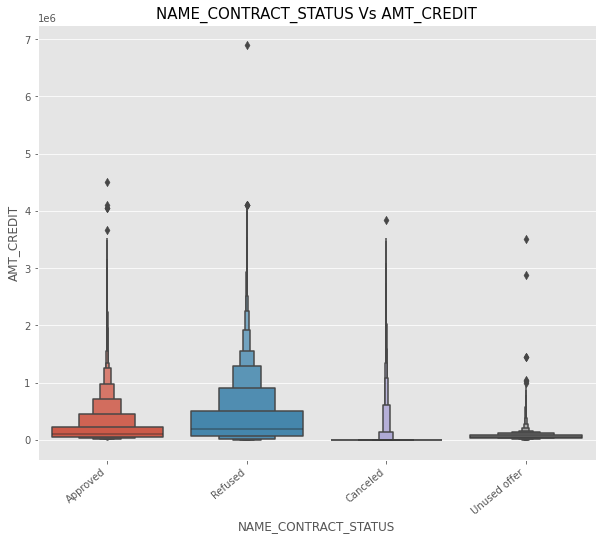

In [115]:
#by-variant analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

### Summary

1. Most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.
2. We can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option. We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.
3. Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.
4. Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors):
(i) How much credit did client asked on the previous application 
(ii) Final credit amount on the previous application that was approved by the bank 
(iii) Goods price of good that client asked for on the previous application.
5. For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application.
6. Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.
7. Loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time. We also see that applications with too high AMT ANNUITY also got refused more often than others.
8. When the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

###  Merging the files and analyzing the data


In [116]:
## Merging the two files to do some analysis
Merged_df = pd.merge(application_df, pre_app_df, how='left', on=['SK_ID_CURR'])

In [117]:
#Data Eyeballing of Merged_df

In [118]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 119 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(46), int64(42), object(29)
memory usage: 1.3+ GB


In [119]:
Merged_df.shape

(1430155, 119)

In [120]:
def uniplot_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewData = Merged_df.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewData=NewData.div(NewData.sum(axis=1),axis='rows')*100
    sns.set()
    NewData.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

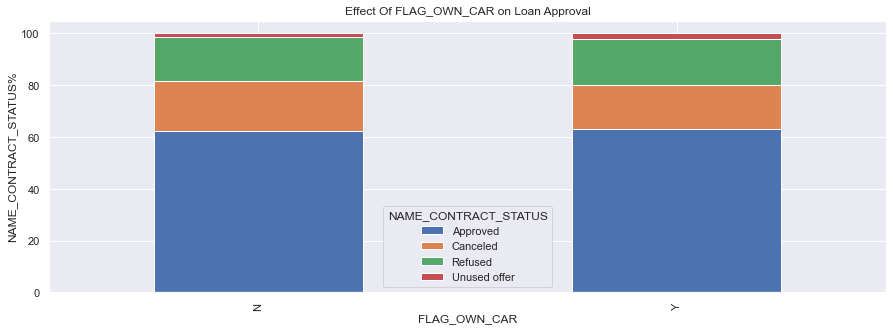

In [121]:
uniplot_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount.

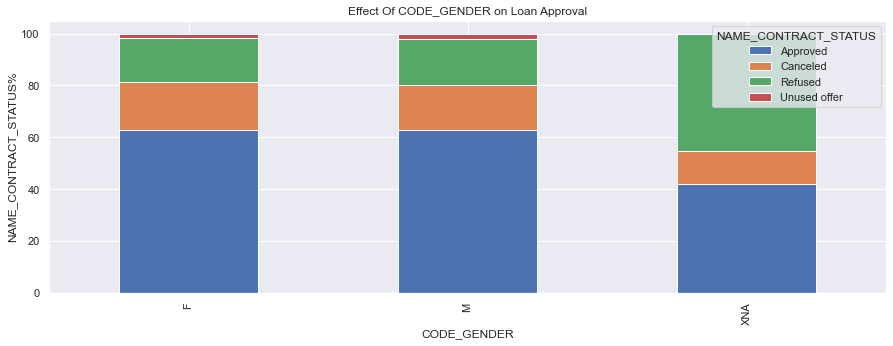

In [122]:
uniplot_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

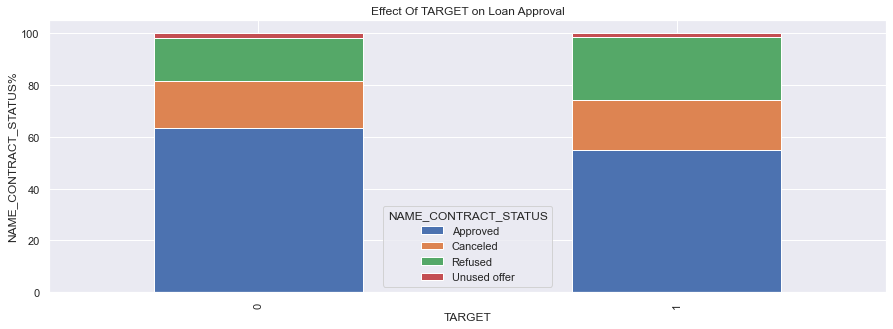

In [123]:
uniplot_combined('TARGET','NAME_CONTRACT_STATUS')

Target variable (0 - Non Defaulter 1 - Defaulter )

We can see that the people who were approved for a loan earlier, defaulted less often, where as people who were refused a loan earlier have higher chances of defaulting.

### Summary

1. We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount.
2. We see that code gender doesn't have any effect on application approval or rejection. But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.
3. We can see that the people who were approved for a loan earlier, defaulted less often, where as people who were refused a loan earlier have higher chances of defaulting.